# The weird things that happen in high dimension space

## Imports etc

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import scipy

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib as mpl

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
np.set_printoptions(linewidth=1000)

mpl.rcParams.update({
    "figure.dpi": 200,                    
    "font.size": 10,
    # Ticks
    "ytick.right": True,
    "ytick.direction": "in",
    "ytick.minor.visible": False,
    "xtick.top": True,
    "xtick.direction": "in",
    "xtick.minor.visible": False,
    "lines.linewidth" : 0.8,
    "lines.markersize" : 3,
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Most of the volume is at the edge

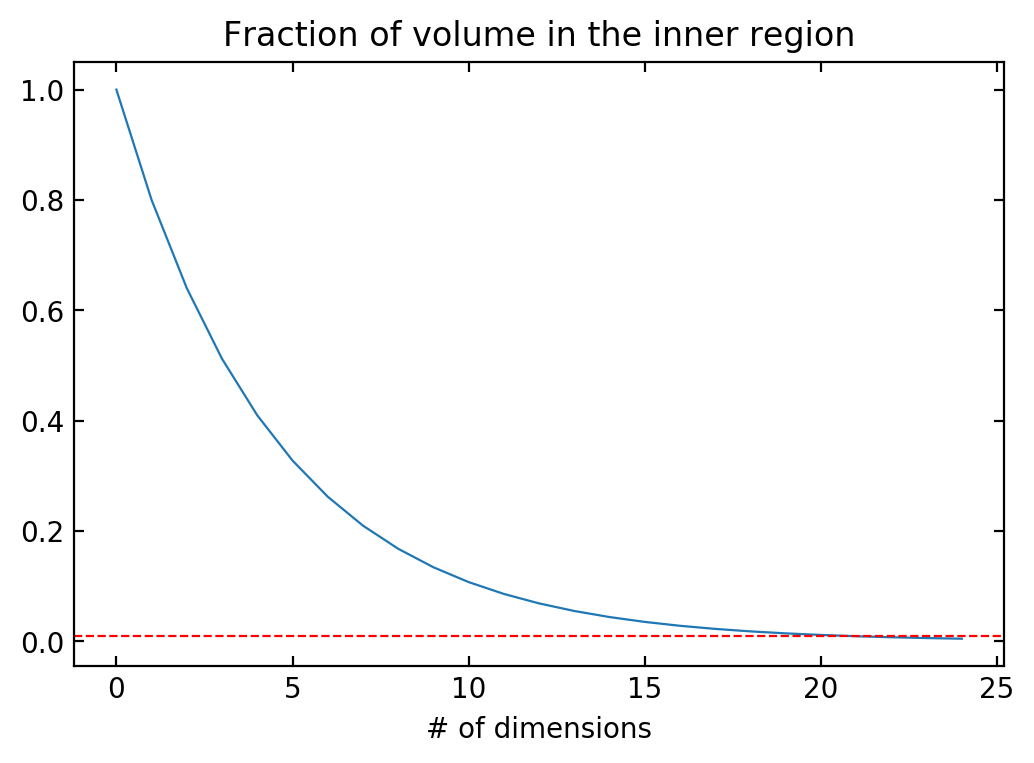

In [22]:
box_size = 1
edge_frac = 0.1
inner_box_size = box_size - box_size*edge_frac*2

dims = np.arange(25)

_, ax = plt.subplots()
ax.plot(dims, inner_box_size**dims / box_size**dims)
ax.axhline(0.01, color="red", ls="--")
ax.set(
    title="Fraction of volume in the inner region",
    xlabel="# of dimensions",
);

# Volume and surface area of hypersphere

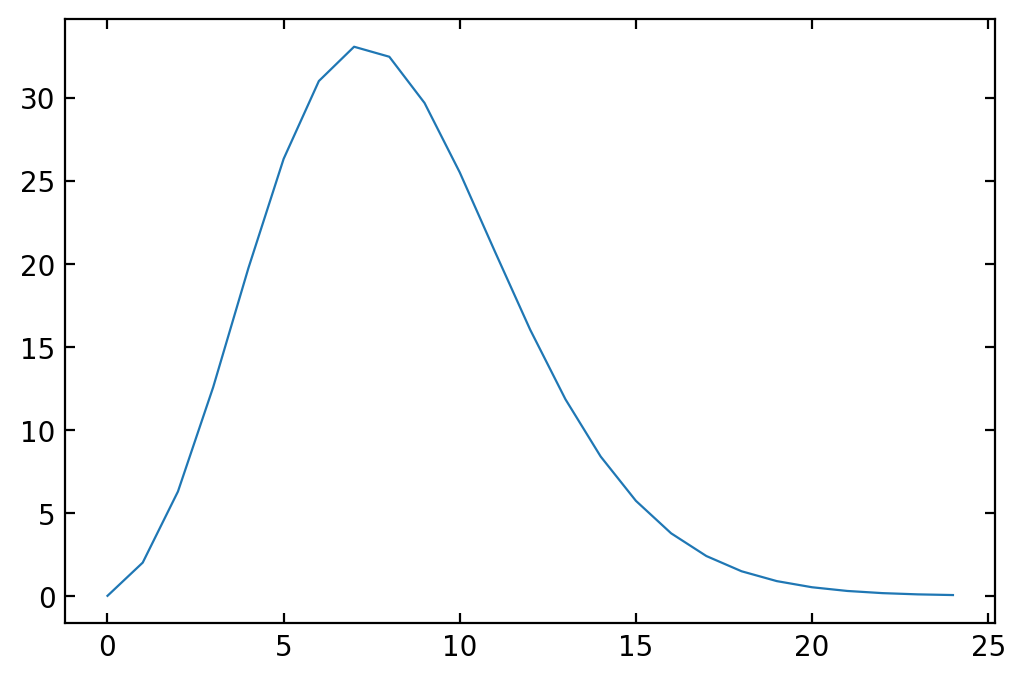

In [53]:
# From http://mathworld.wolfram.com/Hypersphere.html

def hyper_area(dims):
    return 2*np.pi**(dims/2) / scipy.special.gamma(dims/2)
   
dims = np.arange(25)
    
_, ax = plt.subplots()
ax.plot(dims, area(dims))

As a result most of the probability mass in a high dimensional pdf is not at the mode!

In [29]:
g = norm(loc=0, scale=1)
x = np.linspace(0, 10, 10000)
y = g.pdf(x)

dims = np.arange(25)

for d in dims:
    mg = multivariate_normal(mean = np.zeros(d), cov = np.diag(np.ones(d)))
    
    locs = np.zeros((len(x), d))
    locs[:,-1] = x
    
    density_at_r = mg.pdf(locs)
    
    area_at_r = np.pi*
    

np.trapz(y, x)

SyntaxError: invalid syntax (<ipython-input-29-64c87191ce77>, line 7)

In [46]:
mg = multivariate_normal(mean = np.zeros(2), cov = np.diag(np.ones(2)))
mg.pdf(np.array([[0, 0], [0, 1]]))

array([0.15915494, 0.09653235])